https://onlinelibrary.wiley.com/doi/book/10.1002/0471249688

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

____
# Asprin v Placemo


In [2]:
result = [189, 10845, 104, 10933]
d = {
    'group': np.repeat(('placebo','placebo','aspirn','aspirn'), (result)),
    'heart_attack' : np.repeat(('yes','no', 'yes','no'), (result)),
    
}

drug = pd.DataFrame(d, columns=['group', 'heart_attack'])
dummy_ = pd.get_dummies(drug[['group']])
drug = pd.concat([drug, dummy_], axis=1)

# one hot encoding
heart_attack = {"no":0, "yes":1}
drug['attack_'] = drug.heart_attack.map(heart_attack)

drug.head()

,group,heart_attack,group_aspirn,group_placebo,attack_
0,placebo,yes,0,1,1
1,placebo,yes,0,1,1
2,placebo,yes,0,1,1
3,placebo,yes,0,1,1
4,placebo,yes,0,1,1


In [3]:
tb = pd.crosstab([drug.group], drug.heart_attack).T.sort_values('heart_attack', ascending=False).T.sort_values('group', ascending=False)

print(tb)

tab = sm.stats.Table2x2(tb.values)
chi2, p, dof, ex = stats.chi2_contingency(tb, correction=False)

print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", round(chi2, 3))
print("p-value  : ", round(p, 3))
print("degree of f: ", dof)

hi, low = tab.oddsratio_confint()
print("Odds Ratio CI: ", (round(hi, 3), round(low, 3)))
print("\n2x2 Summary:")
print(tab.summary())

heart_attack  yes     no
group                   
placebo       189  10845
aspirn        104  10933
Pearson's Chi-squared test with Yates' continuity correction
X-squared:  25.014
p-value  :  0.0
degree of f:  1
Odds Ratio CI:  (1.44, 2.331)

2x2 Summary:
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.832       1.440 2.331   0.000
Log odds ratio    0.605 0.123 0.365 0.846   0.000
Risk ratio        1.818       1.433 2.306   0.000
Log risk ratio    0.598 0.121 0.360 0.835   0.000
-------------------------------------------------


__the sample relative risk is p1/p2 =0.0171/0.0094=1.82. The sample proportionof MI cases was 82% higher for the group taking placebo.The sample difference of proportions of 0.008 makes it seem as if the two groups differ by a trivial amount__

__We can be 95% conﬁdent that, after 5 years, the proportion of MI cases for male physicians taking placebo is between 1.43 and 2.30 times the proportion of MI cases for male physicians taking aspirin. This indicates that the risk of MI is at least 43% higher for the placebo group.__

___
# Dealth Penalty Example

In [4]:
result = [53, 414, 11, 37, 0, 16, 4, 139]
d = {
    'defendent_race': np.repeat(('white','white','white','white','black','black','black','black'), (result)),
    'victim_race' : np.repeat(('white', 'white', 'black', 'black', 'white', 'white', 'black', 'black'), (result)),
    'death_penalty': np.repeat(('yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'), (result))
}

death = pd.DataFrame(d, columns=['defendent_race', 'victim_race','death_penalty'])
death_tb = pd.crosstab([death.defendent_race, death.victim_race], death.death_penalty)
death_tb

death_penalty                no  yes
defendent_race victim_race          
black          black        139    4
               white         16    0
white          black         37   11
               white        414   53

In [5]:
death_tb2 = pd.crosstab([death.defendent_race, death.death_penalty], death.victim_race)

chi2, p, dof, ex = stats.chi2_contingency(death_tb2, correction=False)

print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

Pearson's Chi-squared test with Yates' continuity correction
X-squared:  391.2388311215385
p-value  :  1.7491785031397792e-84
degree of f:  3


In [6]:
death_vW = pd.crosstab([death[death.victim_race=='white'].defendent_race], death.death_penalty)

tab = sm.stats.Table2x2(death_vW.values)
chi2, p, dof, ex = stats.chi2_contingency(death_vW, correction=False)
print("Victim = White:")
print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", round(chi2, 3))
print("p-value  : ", round(p, 3))
print("degree of f: ", dof)


hi, low = tab.oddsratio_confint()
print("Odds Ratio CI: ", (round(hi, 3), round(low, 3)))
print("\n2x2 Summary:")
print(tab.summary())


Victim = White:
Pearson's Chi-squared test with Yates' continuity correction
X-squared:  2.04
p-value  :  0.153
degree of f:  1
Odds Ratio CI:  (0.252, 72.022)

2x2 Summary:
               Estimate   SE   LCB    UCB   p-value
---------------------------------------------------
Odds ratio        4.259        0.252 72.022   0.315
Log odds ratio    1.449 1.443 -1.379  4.277   0.315
Risk ratio        1.096        1.003  1.198   0.044
Log risk ratio    0.092 0.045  0.003  0.180   0.044
---------------------------------------------------


In [7]:
death_vB = pd.crosstab([death[death.victim_race=='black'].defendent_race], death.death_penalty)
tab = sm.stats.Table2x2(death_vB.values)
chi2, p, dof, ex = stats.chi2_contingency(death_vB, correction=False)

print("\nVictim = Black:")
print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", round(chi2, 3))
print("p-value  : ", round(p, 3))
print("degree of f: ", dof)

hi, low = tab.oddsratio_confint()
print("Odds Ratio CI: ", (round(hi, 3), round(low, 3)))
print("\n2x2 Summary:")
print(tab.summary())



Victim = Black:
Pearson's Chi-squared test with Yates' continuity correction
X-squared:  20.102
p-value  :  0.0
degree of f:  1
Odds Ratio CI:  (3.11, 34.315)

2x2 Summary:
               Estimate   SE   LCB   UCB   p-value
--------------------------------------------------
Odds ratio       10.331       3.110 34.315   0.000
Log odds ratio    2.335 0.612 1.135  3.536   0.000
Risk ratio        1.261       1.078  1.475   0.004
Log risk ratio    0.232 0.080 0.075  0.389   0.004
--------------------------------------------------


In [11]:
## load the iris dataset and set up variables
from sklearn import datasets
iris = datasets.load_iris()
iris_features = iris.data
iris_target = iris.target
target_values=sorted(list(set(iris_target)))	# output: [0,1,2]
target_names = iris.target_names	# output: ["setosa","versicolor","virginica"]
del iris

# load up preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
iris_features = sc.fit_transform(iris_features)


## perform PCA of 2 dimensions on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_object = pca.fit(iris_features) # creates a PCA object for (input)
# Returns a new basis*data matrix, X_pca which is reduced to 2 dimensions instead of 4
X_pca = pca_object.transform(iris_features)
del pca_object

In [12]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
## perform LDA of 2 dimensions on the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_object = lda.fit(iris_features, iris_target) # creates an LDA object for (inputs, targets)
# Returns a new basis*data matrix, like PCA does
X_lda = lda_object.transform(iris_features)
lda_object
del lda_object

In [18]:
# for comparison against LDA, also perform PCA before doing LDA, then comparison of plots 1 and 3 is possible
lda_object = lda.fit(X_pca, iris_target)
X_pca_lda = lda_object.transform(X_pca)
del lda_object

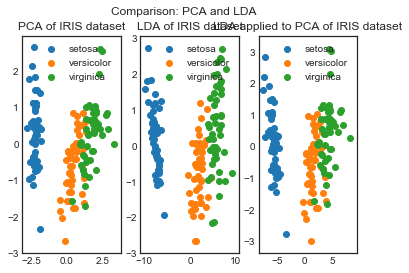

In [32]:
## Create a plot figure and compare PCA/LDA
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison: PCA and LDA") # title of plot
 
# define a reusable plotting function for plotting data matrices
def subplot_scatter_iris(subplot_location=None, input_matrix=None, title=None, set_legend=True):
    ax = fig.add_subplot(subplot_location) # add a subplot
    
    # create a scatter plot parsing through data points of the matrix, and their corresponding labeled outputs
    for i, target in zip(target_values, target_names):
        ax.scatter(input_matrix[iris_target == i, 0], input_matrix[iris_target == i, 1], label=target)

    if set_legend == True:  # add a legend if set_legend is True
        ax.legend(loc='best',scatterpoints=1)

    if title: # add a title if not null
        ax.set_title(title)
 
# Plot the PCA in location 1, then LDA in 2, then PCA+LDA in 3
subplot_scatter_iris(131, X_pca, "PCA of IRIS dataset", True)
subplot_scatter_iris(132, X_lda, "LDA of IRIS dataset", True)
subplot_scatter_iris(133, X_pca_lda, "LDA applied to PCA of IRIS dataset", True)

In [34]:
## CLASSIFIER - Evaluation of the techniques via confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0)

In [36]:
def perform_evaluation(feature_set,target_set):
    def namestr(obj, namespace):
    	    return [name for name in namespace if namespace[name] is obj]
    print("Evaluation for:",namestr(feature_set,globals())[0])

    feat_train, feat_test, target_train, target_test = train_test_split(feature_set, target_set, test_size=0.2, random_state=3)
    
    classifier.fit(feat_train, target_train)
    predicted = classifier.predict(feat_test)
    print("Accuracy: ",accuracy_score(target_test, predicted))
    print(confusion_matrix(target_test, predicted))

perform_evaluation(iris_features, iris_target)
perform_evaluation(X_pca, iris_target)
perform_evaluation(X_lda, iris_target)
perform_evaluation(X_pca_lda, iris_target)
# print evaluation, before drawing the plot
plt.show()

Evaluation for: iris_features
Accuracy:  0.9333333333333333
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Evaluation for: X_pca
Accuracy:  0.8333333333333334
[[10  0  0]
 [ 0  7  3]
 [ 0  2  8]]
Evaluation for: X_lda
Accuracy:  0.8666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  4  6]]
Evaluation for: X_pca_lda
Accuracy:  0.8
[[10  0  0]
 [ 0  7  3]
 [ 0  3  7]]


C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

def plot_scikit_lda(X, title):

   ax = plt.subplot(111)
   for label,marker,color in zip(range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

       plt.scatter(x=X[:,0][y == label],
                   y=X[:,1][y == label]*–1, # flip the figure
                   marker=marker,
                   color=color,
                   alpha=0.5,
                   label=label_dict[label])

   plt.xlabel('LD1')
   plt.ylabel('LD2')

   leg = plt.legend(loc='upper right', fancybox=True)
   leg.get_frame().set_alpha(0.5)
   plt.title(title)

   # hide axis ticks
   plt.tick_params(axis='both', which='both', bottom='off', top='off',  
           labelbottom='on', left='off', right='off', labelleft='on')

   # remove axis spines
   ax.spines['top'].set_visible(False)  
   ax.spines['right'].set_visible(False)
   ax.spines['bottom'].set_visible(False)
   ax.spines['left'].set_visible(False)    

   plt.grid()
   plt.tight_layout
   plt.show()

plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

SyntaxError: invalid character in identifier (<ipython-input-40-8a7c63630adf>, line 11)

In [42]:
X[:,1][y == label]

NameError: name 'X' is not defined